In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import time as t
import datetime as dt
import string as st
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy import genfromtxt
import math as m
from __future__ import print_function

In [97]:
y = np.genfromtxt('Martrix_Y_streamingserver.csv',delimiter=';')

#data = [1] * 3 + [2] * 3
#data *= 3
data = y[1:10];
print(y)

[ 5.2         5.8         5.06666667 ...,  5.66666667  5.26666667
  4.33333333]


In [98]:
from pybrain.datasets import SequentialDataSet
from itertools import cycle

ds = SequentialDataSet(1, 1)
for sample, next_sample in zip(data, cycle(data[1:])):
    ds.addSample(sample, next_sample)

In [99]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure.modules import LSTMLayer

net = buildNetwork(1, 20,5, 1, 
                   hiddenclass=LSTMLayer, outputbias=False, recurrent=True)

SystemExit: LSTM networks with > 1 hidden layers are not supported!

To exit: use 'exit', 'quit', or Ctrl-D.


In [107]:
from pybrain.supervised import RPropMinusTrainer
from sys import stdout

trainer = RPropMinusTrainer(net, dataset=ds)
train_errors = [] # save errors for plotting later
EPOCHS_PER_CYCLE = 20
CYCLES = 500
EPOCHS = EPOCHS_PER_CYCLE * CYCLES
for i in xrange(CYCLES):
    trainer.trainEpochs(EPOCHS_PER_CYCLE)
    train_errors.append(trainer.testOnData())
    epoch = (i+1) * EPOCHS_PER_CYCLE
    print("\r epoch {}/{}".format(epoch, EPOCHS), end="")
    stdout.flush()

print()
print("final error =", train_errors[-1])

 epoch 10000/10000
final error = 1.1829540372e-10


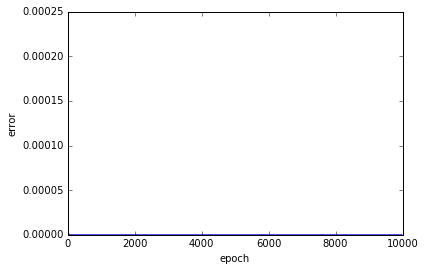

In [108]:
import matplotlib.pyplot as plt

plt.plot(range(0, EPOCHS, EPOCHS_PER_CYCLE), train_errors)
plt.xlabel('epoch')
plt.ylabel('error')

In [113]:
#from sklearn.metrics import mean_squared_error
from math import sqrt
#from __future__ import math


sample = y;
target = y;
error = 0.0;
printl = 1;
eer = 0.0;
for i in range(np.size(sample)):
    error += (net.activate(sample[i])-sample[i])**2;
'''    if printl :
        print("               sample = %4.1f" % sample[i])
        print("predicted next sample = %4.1f" % net.activate(sample[i]))
        print("   actual next sample = %4.1f" % target[i])
        print()'''      
err = sqrt(error/np.size(sample));    
print("The Root Mean Squared Error ",err);
    
'''    
for i in range(np.size(y)-1):
    error += (y[i] - net.activate(y[i]))**2;
print('The error is Error = ', (error/np.size(y)))
'''

The Root Mean Squared Error  10.3562251542


"    \nfor i in range(np.size(y)-1):\n    error += (y[i] - net.activate(y[i]))**2;\nprint('The error is Error = ', (error/np.size(y)))\n"

In [114]:
# draw the two function side by side please
tmps = np.arange(np.size(sample))
net.activate(sample[0])

array([-9.15738988])

In [115]:
arr  = np.zeros(shape=(np.size(sample),1))
i = 0;
for i in range(np.size(sample)):
    arr[i] = net.activate(sample[i])
arr[10]

array([ 2.83201645])

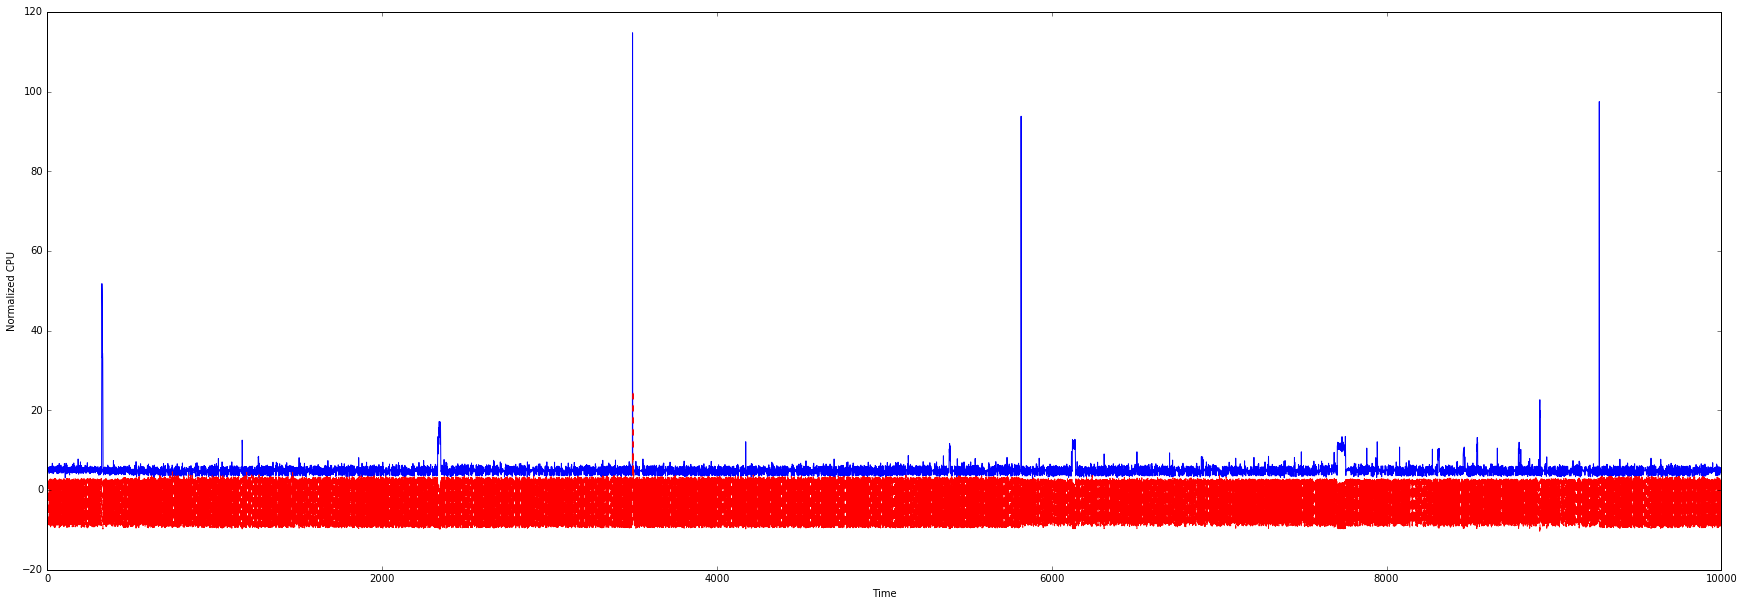

In [116]:

#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.axis([0, 2000, 0, 0.03])
#plt.grid(True)
#plt.axis([0, 1500, 0, 16])
plt.subplots(figsize=(30, 10))
plt.plot(tmps,sample,'b-');# ,tmps,arr,predsscaled,'r*')
#plt.hist(y, 1496 , facecolor='b',)
plt.plot(tmps,arr,'r--')
plt.xlabel('Time')
plt.ylabel('Normalized CPU')